# Pytorch Custom Datasets


### 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.3.1+cu121'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 1. Get Data
- Our dataset is a subset of the Food101 dataset.
- Food101 starts with 101 different categories of food and 1000 images per class ( 750 training, 250 each testing)
- Our dataset starts with 3 classes of food and only 10% of the images (~75% training, 25 testing each)
- Why do this?
- When starting with ML project, it's important to try things on small scale and then increase the scale when necessary.
- The whole point is to speed up how fast you can experiment.

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to the data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesn't exist , download it and perpare it
if image_path.is_dir():
    print(f"{image_path} directory already exists ..... skipping download")
else:
    image_path.mkdir(parents=True, exist_ok=True)

# Download the data
with open(data_path / "pizza_steak_sushi.zip", "wb")as f:
    #### Always copy the raw file from the github
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading.....")
    f.write(request.content)

# unzip the zip file downloaded
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unziping the dataset.......")
    zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists ..... skipping download
Downloading.....
Unziping the dataset.......


### 2. Becoming one with the data ( data preparation and data exploration )

In [5]:
import os
def walk_through_dir(dir_path):
    """Walks through dir path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi.
There are 3 directories and 0 images in data\pizza_steak_sushi\test.
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza.
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak.
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi.
There are 3 directories and 0 images in data\pizza_steak_sushi\train.
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza.
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak.
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi.


In [7]:
# Setup training and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

#### 2.1 Visualizing and images

Lets write some code to:
1. Get all of the image paths
2. Pick a random image path using python's `random.choice()`
3. Get the image class name using `Pathlib.Path.parent.stem`
4. Since we are working with images, open the image using PIL library
5. We will show th image and print the data

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image Height: 408
Image Width: 512


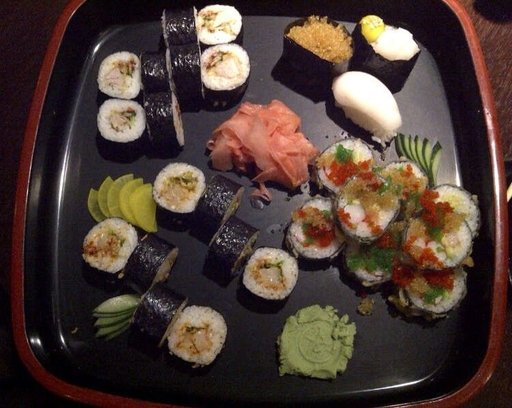

In [11]:
import random
from PIL import Image

# set Seed
random.seed(42)

# 1.  get all the image paths
image_path_lists = list(image_path.glob("*/*/*.jpg"))

# 2. Random image path and plot it
random_image_path = random.choice(image_path_lists)
#print(random_image_path)

# 3. Get the image class from the path name ( the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
#print(image_class)

# 4. Open image 
img = Image.open(random_image_path)

# 5. print Metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img


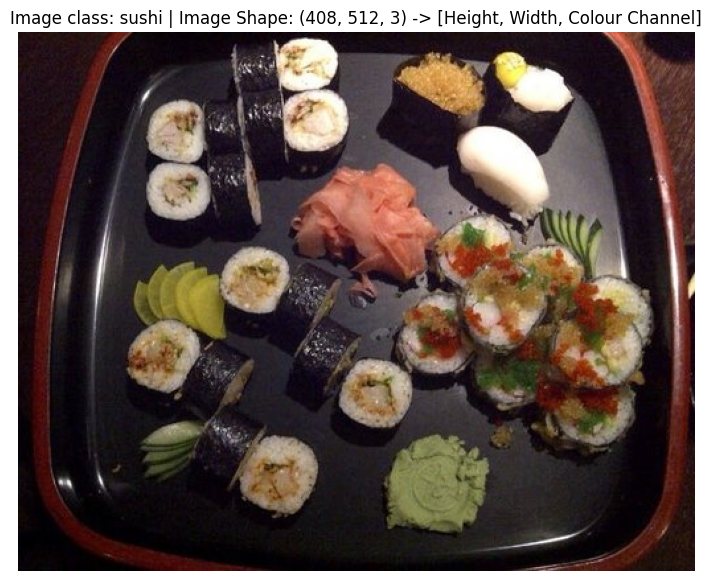

In [12]:
# try to visulaize the image with mmatplotlib library
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image Shape: {img_as_array.shape} -> [Height, Width, Colour Channel]")
plt.axis(False);